In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
county = "Kaohsiung_City"
path = f"../data/processed/{county}.csv"

try:
    df = pd.read_csv(path)
    df["date"] = pd.to_datetime(df["date"])
    df = df.set_index("date")
except FileNotFoundError:
    print("Can't find the county name.")

# Group by the sitename column and resample it by month to get the mean of pm2.5

In [20]:
pollutant = "pm2.5"
df_monthly = df.groupby("sitename").resample("ME")[pollutant].mean().reset_index()
df_monthly

,sitename,date,pm2.5
0,Daliao,2016-11-30,25.447619
1,Daliao,2016-12-31,41.098066
2,Daliao,2017-01-31,36.934114
3,Daliao,2017-02-28,35.672308
4,Daliao,2017-03-31,33.204138
...,...,...,...
1172,Zuoying,2024-04-30,19.987324
1173,Zuoying,2024-05-31,20.878912
1174,Zuoying,2024-06-30,10.393466
1175,Zuoying,2024-07-31,9.046512


# Extract the year and month data

In [22]:
df_monthly["year"] = df_monthly["date"].dt.year
df_monthly["month"] = df_monthly["date"].dt.month
df_monthly

,sitename,date,pm2.5,year,month
0,Daliao,2016-11-30,25.447619,2016,11
1,Daliao,2016-12-31,41.098066,2016,12
2,Daliao,2017-01-31,36.934114,2017,1
3,Daliao,2017-02-28,35.672308,2017,2
4,Daliao,2017-03-31,33.204138,2017,3
...,...,...,...,...,...
1172,Zuoying,2024-04-30,19.987324,2024,4
1173,Zuoying,2024-05-31,20.878912,2024,5
1174,Zuoying,2024-06-30,10.393466,2024,6
1175,Zuoying,2024-07-31,9.046512,2024,7


# Draw the heat map by month

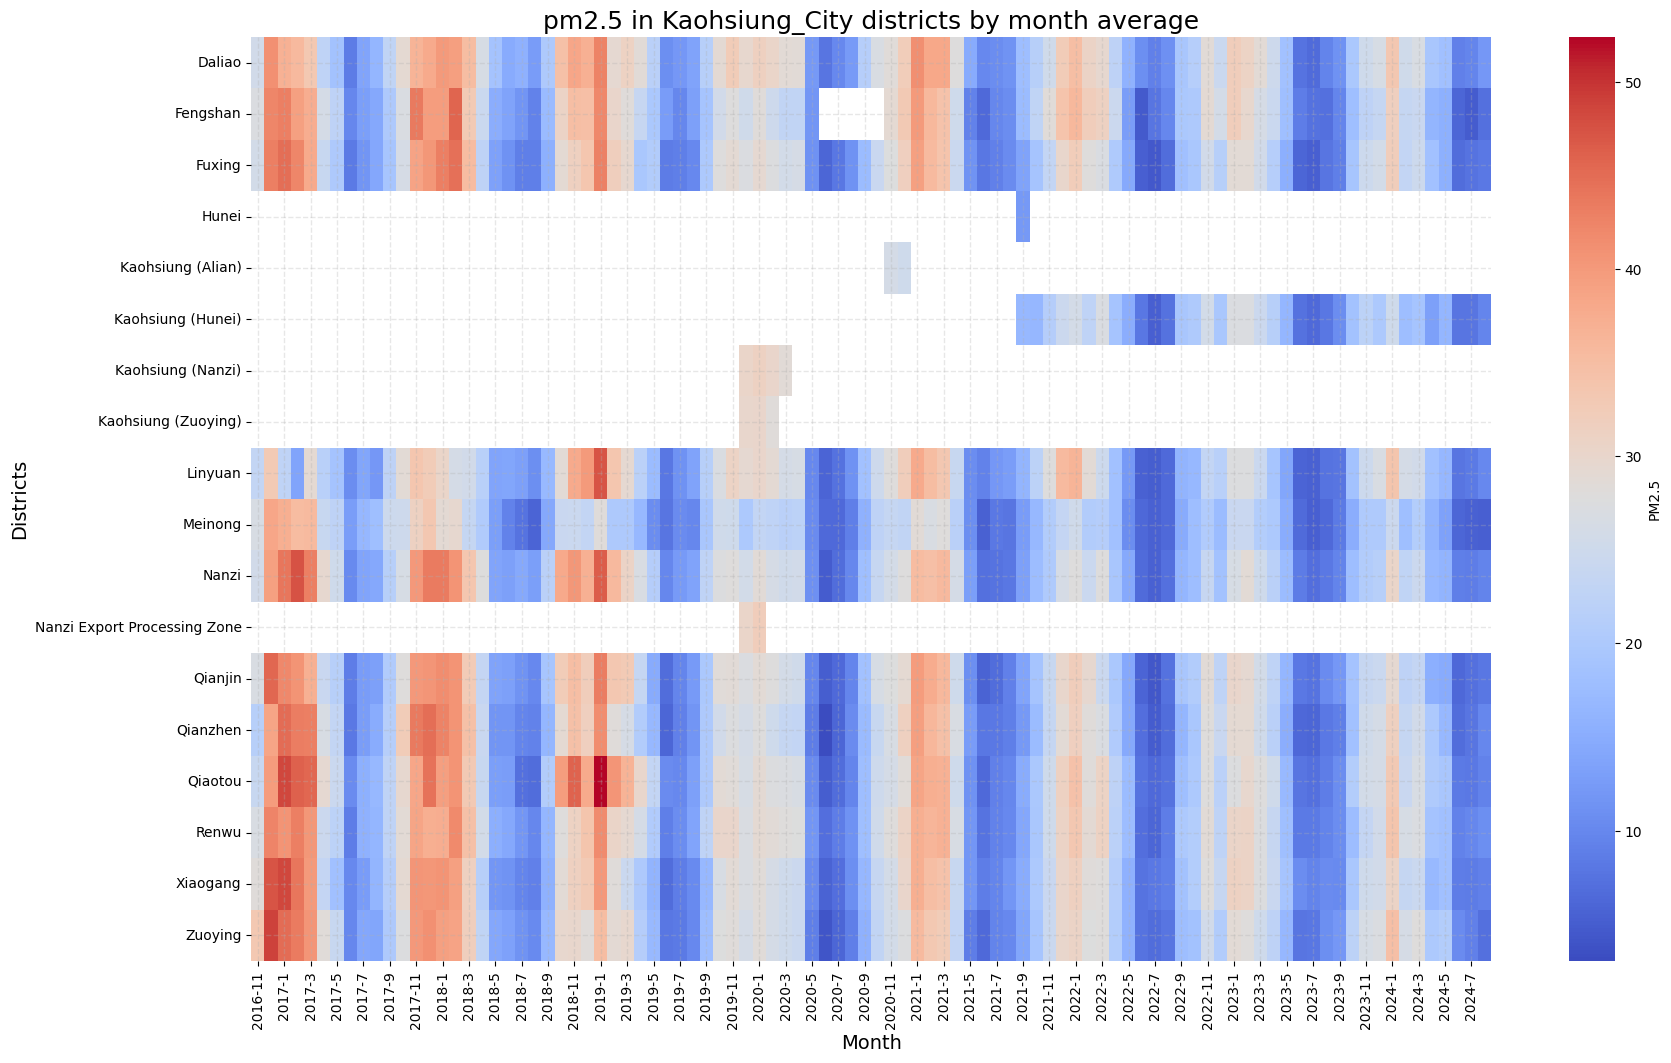

In [35]:
df_pivot = df_monthly.pivot_table(values=pollutant, index="sitename", columns=["year", "month"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by month average", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_month.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()

# Group by the sitename column and resample it by year to get the mean of pm2.5

In [29]:
pollutant = "pm2.5"
df_yearly = df.groupby("sitename").resample("YE")[pollutant].mean().reset_index()

df_yearly["year"] = df_yearly["date"].dt.year
df_yearly

,sitename,date,pm2.5,year
0,Daliao,2016-12-31,39.115802,2016
1,Daliao,2017-12-31,26.096974,2017
2,Daliao,2018-12-31,27.846090,2018
3,Daliao,2019-12-31,25.272462,2019
4,Daliao,2020-12-31,22.566189,2020
...,...,...,...,...
116,Zuoying,2020-12-31,18.643779,2020
117,Zuoying,2021-12-31,21.685203,2021
118,Zuoying,2022-12-31,18.943667,2022
119,Zuoying,2023-12-31,19.638432,2023


# Draw the heat map by year

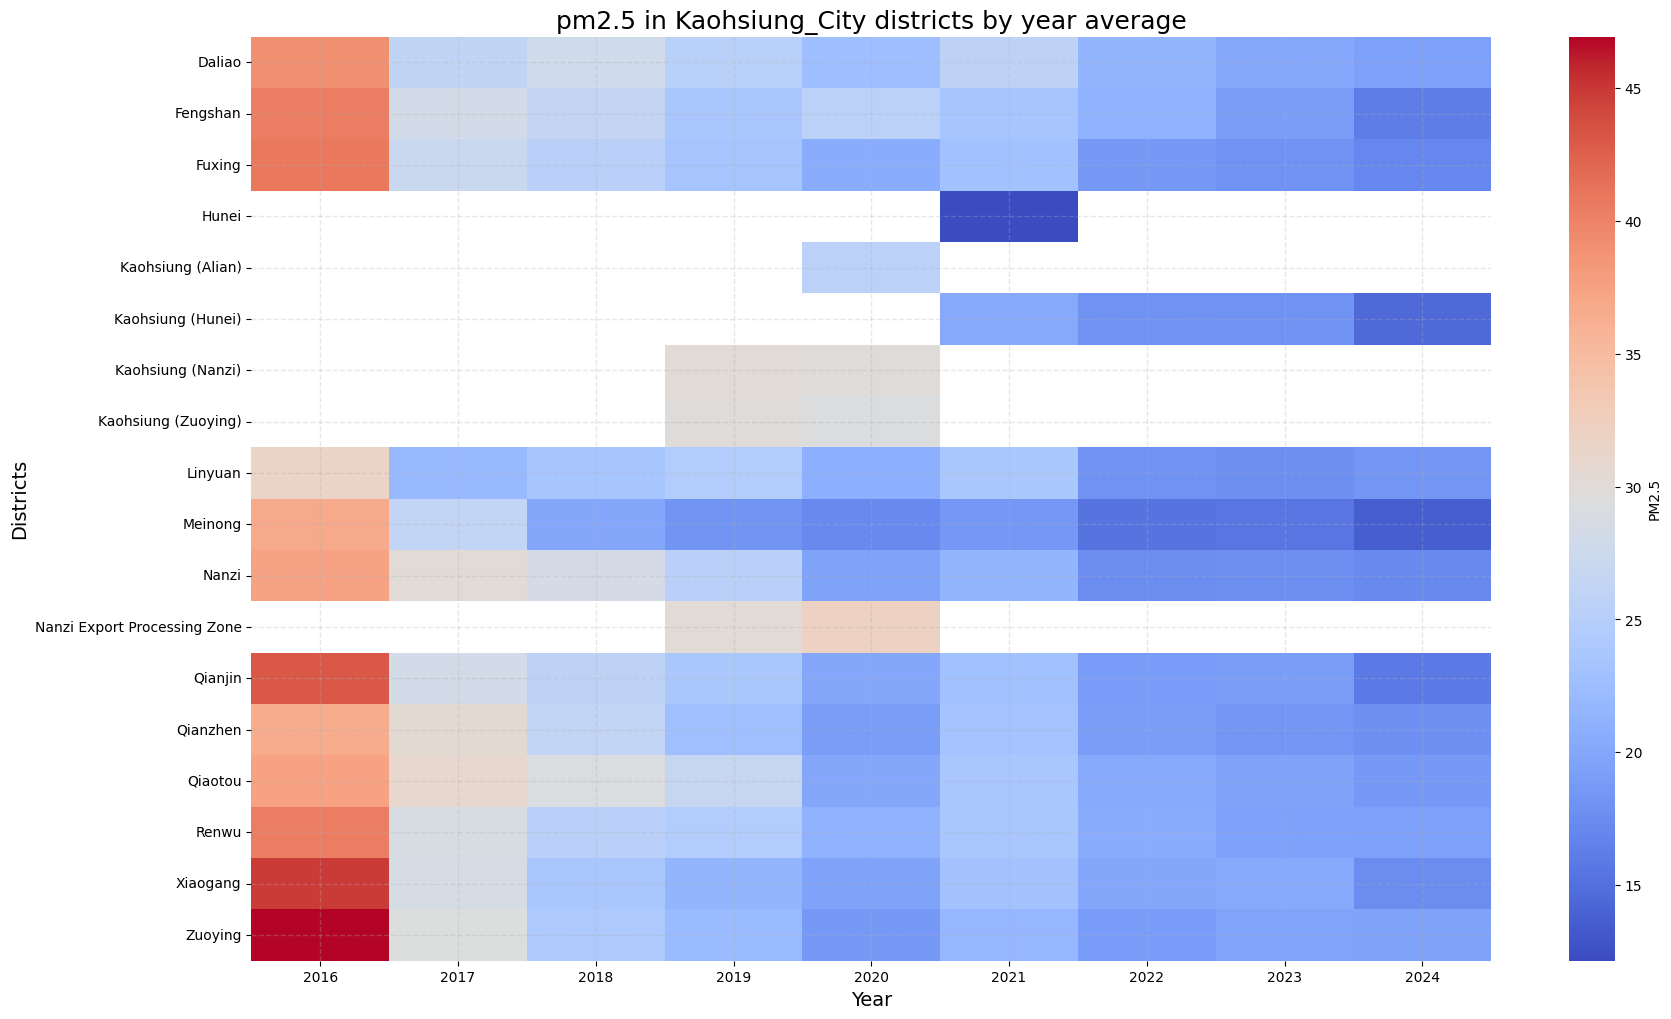

In [36]:
df_pivot = df_yearly.pivot_table(values=pollutant, index="sitename", columns=["year"])

plt.figure(figsize=(20, 12))
sns.heatmap(data=df_pivot, cmap="coolwarm", cbar_kws={"label": "PM2.5"})
plt.title(f"{pollutant} in {county} districts by year average", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Districts", fontsize=14)
plt.grid(linestyle="--", linewidth=1, alpha=0.3)

# save the figure
path = f"../figure/(HM){county}_{pollutant}_year.png"
os.makedirs(os.path.dirname(path), exist_ok=True)
plt.savefig(path, dpi=600, bbox_inches="tight")

plt.show()